In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from axisproj import optimal, objective, make_basis

In [2]:
def prepare(data, method, knn):
    if method == 'lpp':
        X = data.T
        obj = objective.LPPObjective(knn=12,sigma=0.3)
        labs = None
    elif method == 'lde':
        X = data[:, :-1].T
        labs = np.ravel(data[:,-1])
        obj = objective.LDEObjective(knn=12, labs=labs)
    elif method == 'pca':
        X = data.T
        obj = objective.PCAObjective()
        labs = None
    else:
        print(f'unknown method: {method}')
        return
    
    X = StandardScaler().fit_transform(X.T).T
    
    return X, obj, labs

In [3]:
def show(V, colors=None):
    Y = X.T.dot(V)
    if colors is None:
        plt.scatter(Y[:,0],Y[:,1],marker='o',c=X[51,:].T, cmap=plt.get_cmap('viridis'))
    else:
        plt.scatter(Y[:,0],Y[:,1],marker='o',c=colors)
    plt.show()

In [4]:
knn = 12
c = ['r', 'g', 'b']

In [5]:
datasets = dict(
    wine='lde',
    seawater='lpp',
    climate='lde'
)

In [6]:
name = 'seawater'
data = pd.read_csv('../data/'+name+'.csv')
X, obj, labs = prepare(data.values, datasets[name], knn)

In [7]:
lp, ap = optimal(X, obj, normalize=False)
print(len(lp), len(ap))

8 6


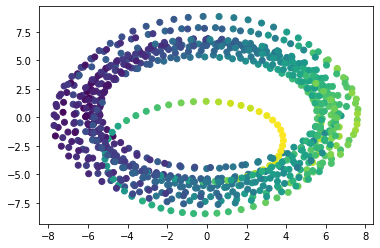

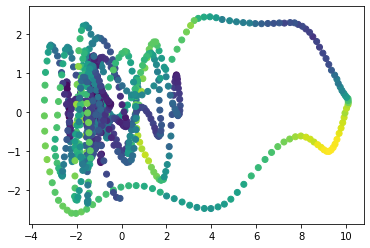

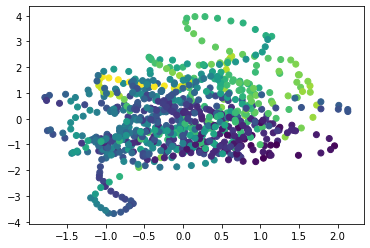

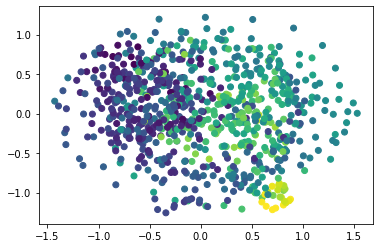

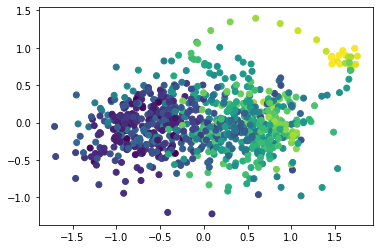

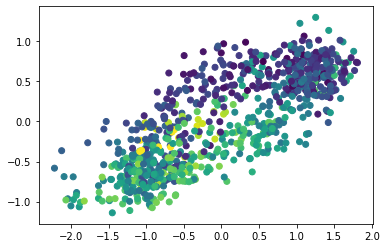

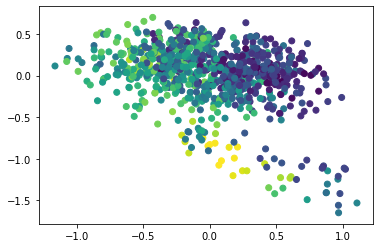

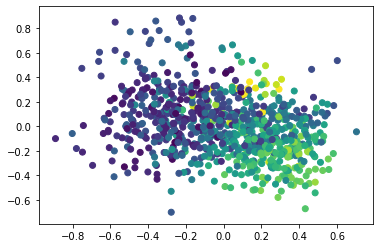

In [8]:
if labs is not None:
    colors = [c[int(v-1)] for v in labs] 
else:
    colors = None
    
for p in lp:
    show(p['V'], colors)

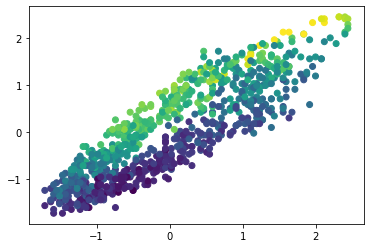

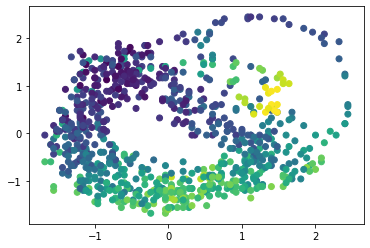

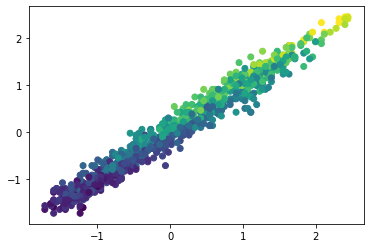

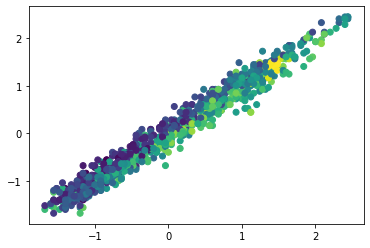

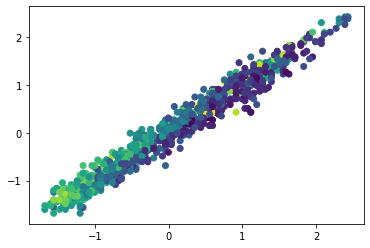

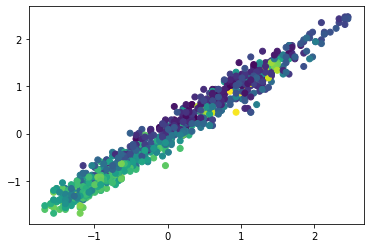

In [10]:
for a in ap:
    V = make_basis(X.shape[0], a['alpha'])
    Y = X.T.dot(V)
    if colors is None:
        plt.scatter(Y[:,0],Y[:,1],marker='o',c=X[51,:].T, cmap=plt.get_cmap('viridis'))
    else:
        plt.scatter(Y[:,0],Y[:,1],marker='o',c=colors)
    plt.show()

In [9]:
d = dict(a=2,b=3).update(b=5,c=7)

In [10]:
d